<h1>Лаба №4</h1>
<h2>Студента БС-83</h2>
<h2>Кльоміна Павла</h2>

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("whitegrid")

Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [3]:
Data = [];
for i in range(6):
    if (i < 3):
        ran=sorted(np.random.normal(0, 1, size = 20))
        Data.append(ran)
    else:
        ran=sorted(np.random.exponential(2, 20))
        Data.append(ran)
for i in Data:
    print(str(i)+'\n')

[-1.6255322871254607, -1.1227377380919348, -0.9478875110686144, -0.9040451589600728, -0.7640542363153129, -0.6806637930704041, -0.5459467019811215, -0.53546877055637, -0.20873854392358537, 0.2947096727986241, 0.30412424522246345, 0.39494918875520774, 0.6789891312713024, 0.7433863788407233, 0.7544675866103898, 0.9527555414002512, 1.1737327844656031, 1.586727533972686, 1.6816336030356476, 2.143763027861924]

[-1.252677243997251, -1.1719869042743054, -1.060744499873067, -0.6169404684773769, -0.5812975069219731, -0.5286051808621576, -0.3453056083082048, -0.24214062629075095, -0.23790561503541888, -0.1043523250523615, 0.5098667498911058, 0.5809145812146971, 0.8402507331473773, 0.9032006157195804, 0.9835089016851051, 0.9899474374057726, 1.0416932651078048, 1.4401657172412237, 1.6398670694439388, 1.719579077128242]

[-2.092540056683398, -1.8566704219129961, -1.575849817968912, -1.2444805858375076, -1.112301486958586, -0.9974653167959168, -0.9739401936180914, -0.7196679548880591, -0.2658498553

In [4]:
def schapiro_uilk(array,n):
    a = pd.read_excel("Coeficients for the W test for normality.xlsx")[n]/10000
    w_table = pd.read_excel("Рoints of the distribution of W.xlsx")[ 'Unnamed: 1'][n]/1000

    k = int(n/2 if (n%2==0) else (n-1)/2)
    m = np.mean(array)
    nm = 0
    for i in array:
        nm += (i-m)**2

    b = 0
    for i in range(k):
        b += a[i]*(array[n-i-1] - array[i])
    w = (b**2)/nm
    
    if(w > w_table):
       
        return "normal"
    else:
        
        return "non-normal"

Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

(0.0, 1.0, 0.0, 1.0)

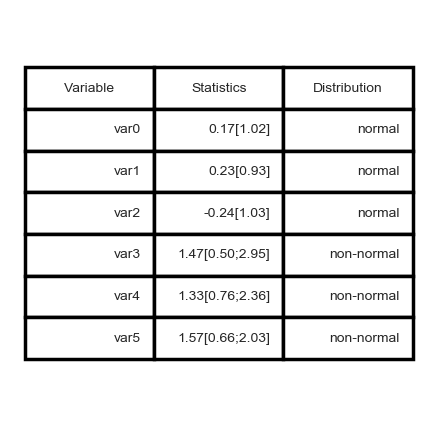

In [8]:
table_st = pd.DataFrame({
    'Variable': [("var"+str(i)) for i in range(6)], 
    'Statistics':
        ['%.2f[%.2f]' % (np.mean(Data[i]),np.std(Data[i]))
             if (schapiro_uilk(Data[i],20)=="normal") else 
         '%.2f[%.2f;%.2f]' % (np.median(Data[i]), np.quantile(Data[i],0.25),np.quantile(Data[i],0.75)) 
         for i in range(6)]
    , 
    'Distribution':[schapiro_uilk(Data[i],20) for i in range(6)]
})
    
fig = plt.figure(figsize=(2,2), dpi=250)
ax=fig.add_subplot(111)
cell_text = []
for row in range(len(table_st)):
    cell_text.append(table_st.iloc[row])

ax.table(cellText=cell_text, colLabels=table_st.columns, loc='center')
ax.axis('off')

Збереження Файлу

In [9]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()